# Tugas Data Science B

**Axl Adilla**  
**20/466397/PPA/05963**

---

## 1. Preprocessing Data

Data perlu dilakukan preprocessing untuk memastikan data yang dimiliki sudah bersih

In [1]:
import pandas as pd

dataset = pd.read_csv('credit-card-default-1000.csv')
dataset

,CUSTID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
0,530,20000.0,2,2.0,2.0,21.0,-1.0,-1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162000.0,0.0,0
1,38,60000.0,2,2.0,2.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,0
2,43,10000.0,1,2.0,2.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,0
3,47,20000.0,2,1.0,2.0,22.0,0.0,0.0,2.0,-1.0,...,291.0,0.0,291.0,291.0,582.0,0.0,0.0,130291.0,651.0,0
4,70,20000.0,1,4.0,2.0,22.0,2.0,0.0,0.0,0.0,...,1831.0,0.0,2891.0,13250.0,433.0,1831.0,0.0,2891.0,153504.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,103,480000.0,M,1.0,1.0,63.0,0.0,0.0,0.0,2.0,...,898.0,325.0,-339603.0,898.0,325.0,898.0,325.0,0.0,345293.0,1
998,388,80000.0,M,3.0,1.0,73.0,-1.0,0.0,0.0,2.0,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1
999,247,250000.0,F,2.0,1.0,75.0,0.0,-1.0,-1.0,-1.0,...,-3684.0,0.0,1386.0,10118.0,47015.0,0.0,4000.0,100000.0,10000.0,1
1000,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Load Data CSV Credit Card

In [2]:
max_row, max_column = dataset.shape

In [3]:
dataset.isnull().sum().sum() # Memeriksa Data Yang bernilai NULL

46

In [4]:
column_null = dataset.isnull().sum() 
column_null

CUSTID       0
LIMIT_BAL    2
SEX          2
EDUCATION    2
MARRIAGE     2
AGE          2
PAY_1        2
PAY_2        2
PAY_3        2
PAY_4        2
PAY_5        2
PAY_6        2
BILL_AMT1    2
BILL_AMT2    2
BILL_AMT3    2
BILL_AMT4    2
BILL_AMT5    2
BILL_AMT6    2
PAY_AMT1     2
PAY_AMT2     2
PAY_AMT3     2
PAY_AMT4     2
PAY_AMT5     2
PAY_AMT6     2
DEFAULTED    0
dtype: int64

In [5]:
row_null = dataset.transpose().isnull().sum()
row_null

0        0
1        0
2        0
3        0
4        0
        ..
997      0
998      0
999      0
1000    23
1001    23
Length: 1002, dtype: int64

In [6]:
def is_delete_row(data, minimum_data_exist = 0.7):
    return (data/max_column) > minimum_data_exist

In [7]:
removed_index = []
removed_data = []
for index,data in enumerate(row_null):
    removed_index.append(index)    
    removed_data.append(data)

In [8]:
removed_index = []
for index, data in enumerate(row_null):
    if is_delete_row(data):
        removed_index.append(index)

In [9]:
dataset = dataset.drop(removed_index)

Row dengan data null lebih dari 70% dihapus

In [10]:
dataset

,CUSTID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
0,530,20000.0,2,2.0,2.0,21.0,-1.0,-1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162000.0,0.0,0
1,38,60000.0,2,2.0,2.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,0
2,43,10000.0,1,2.0,2.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,0
3,47,20000.0,2,1.0,2.0,22.0,0.0,0.0,2.0,-1.0,...,291.0,0.0,291.0,291.0,582.0,0.0,0.0,130291.0,651.0,0
4,70,20000.0,1,4.0,2.0,22.0,2.0,0.0,0.0,0.0,...,1831.0,0.0,2891.0,13250.0,433.0,1831.0,0.0,2891.0,153504.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,932,320000.0,M,1.0,1.0,60.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
996,367,50000.0,F,2.0,1.0,61.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
997,103,480000.0,M,1.0,1.0,63.0,0.0,0.0,0.0,2.0,...,898.0,325.0,-339603.0,898.0,325.0,898.0,325.0,0.0,345293.0,1
998,388,80000.0,M,3.0,1.0,73.0,-1.0,0.0,0.0,2.0,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1


In [11]:
dataset = dataset.drop_duplicates() #menghilangkan data duplikat
dataset

,CUSTID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED
0,530,20000.0,2,2.0,2.0,21.0,-1.0,-1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,162000.0,0.0,0
1,38,60000.0,2,2.0,2.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1576.0,0
2,43,10000.0,1,2.0,2.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1500.0,0
3,47,20000.0,2,1.0,2.0,22.0,0.0,0.0,2.0,-1.0,...,291.0,0.0,291.0,291.0,582.0,0.0,0.0,130291.0,651.0,0
4,70,20000.0,1,4.0,2.0,22.0,2.0,0.0,0.0,0.0,...,1831.0,0.0,2891.0,13250.0,433.0,1831.0,0.0,2891.0,153504.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,932,320000.0,M,1.0,1.0,60.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
996,367,50000.0,F,2.0,1.0,61.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
997,103,480000.0,M,1.0,1.0,63.0,0.0,0.0,0.0,2.0,...,898.0,325.0,-339603.0,898.0,325.0,898.0,325.0,0.0,345293.0,1
998,388,80000.0,M,3.0,1.0,73.0,-1.0,0.0,0.0,2.0,...,-57.0,127.0,-189.0,0.0,1000.0,0.0,500.0,0.0,1000.0,1


In [12]:
dataset['SEX'].value_counts() #Data Sex bersifat Kategori non ordinal

2    338
F    253
1    252
M    157
Name: SEX, dtype: int64

In [13]:
dataset['EDUCATION'].value_counts() #Data Education bersifat Kategori Ordinal

2.0    448
1.0    395
3.0    150
4.0      7
Name: EDUCATION, dtype: int64

In [14]:
dataset['MARRIAGE'].value_counts() #Data Marriage bersifat Kategori non ordinal

2.0    570
1.0    411
3.0     19
Name: MARRIAGE, dtype: int64

In [15]:
dataset['DEFAULTED'].value_counts() #Data Defaulted bersifat Kategori non ordinal

0    597
1    403
Name: DEFAULTED, dtype: int64

In [16]:
dataset['SEX'] = dataset['SEX'].replace({"2" : 1, "F" : 1, "1" : 0, "M" : 0})

In [17]:
dataset['SEX'].value_counts() #Data Sex bersifat Kategori non ordinal

1    591
0    409
Name: SEX, dtype: int64

In [18]:
dataset = pd.get_dummies(dataset, columns=['MARRIAGE'], prefix=['MARRIAGE_STATUS']) #One Hot Encoding Data Marriage
dataset

,CUSTID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED,MARRIAGE_STATUS_1.0,MARRIAGE_STATUS_2.0,MARRIAGE_STATUS_3.0
0,530,20000.0,1,2.0,21.0,-1.0,-1.0,2.0,2.0,-2.0,...,0.0,0.0,0.0,0.0,162000.0,0.0,0,0,1,0
1,38,60000.0,1,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,1576.0,0,0,1,0
2,43,10000.0,0,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,1500.0,0,0,1,0
3,47,20000.0,1,1.0,22.0,0.0,0.0,2.0,-1.0,0.0,...,291.0,582.0,0.0,0.0,130291.0,651.0,0,0,1,0
4,70,20000.0,0,4.0,22.0,2.0,0.0,0.0,0.0,-1.0,...,13250.0,433.0,1831.0,0.0,2891.0,153504.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,932,320000.0,0,1.0,60.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
996,367,50000.0,1,2.0,61.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
997,103,480000.0,0,1.0,63.0,0.0,0.0,0.0,2.0,-1.0,...,898.0,325.0,898.0,325.0,0.0,345293.0,1,1,0,0
998,388,80000.0,0,3.0,73.0,-1.0,0.0,0.0,2.0,-1.0,...,0.0,1000.0,0.0,500.0,0.0,1000.0,1,1,0,0


In [19]:
dataset = dataset.drop(columns=['CUSTID']) #menghilangkan CustID
dataset

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTED,MARRIAGE_STATUS_1.0,MARRIAGE_STATUS_2.0,MARRIAGE_STATUS_3.0
0,20000.0,1,2.0,21.0,-1.0,-1.0,2.0,2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,162000.0,0.0,0,0,1,0
1,60000.0,1,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,1576.0,0,0,1,0
2,10000.0,0,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,1500.0,0,0,1,0
3,20000.0,1,1.0,22.0,0.0,0.0,2.0,-1.0,0.0,-1.0,...,291.0,582.0,0.0,0.0,130291.0,651.0,0,0,1,0
4,20000.0,0,4.0,22.0,2.0,0.0,0.0,0.0,-1.0,-1.0,...,13250.0,433.0,1831.0,0.0,2891.0,153504.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,320000.0,0,1.0,60.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
996,50000.0,1,2.0,61.0,0.0,0.0,0.0,0.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
997,480000.0,0,1.0,63.0,0.0,0.0,0.0,2.0,-1.0,-1.0,...,898.0,325.0,898.0,325.0,0.0,345293.0,1,1,0,0
998,80000.0,0,3.0,73.0,-1.0,0.0,0.0,2.0,-1.0,-1.0,...,0.0,1000.0,0.0,500.0,0.0,1000.0,1,1,0,0


In [20]:
dataset['DEFAULTED']
dataset['TARGET'] = dataset['DEFAULTED']
dataset = dataset.drop(columns=['DEFAULTED'])

In [21]:
dataset

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_STATUS_1.0,MARRIAGE_STATUS_2.0,MARRIAGE_STATUS_3.0,TARGET
0,20000.0,1,2.0,21.0,-1.0,-1.0,2.0,2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,162000.0,0.0,0,1,0,0
1,60000.0,1,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,1576.0,0,1,0,0
2,10000.0,0,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,1500.0,0,1,0,0
3,20000.0,1,1.0,22.0,0.0,0.0,2.0,-1.0,0.0,-1.0,...,291.0,582.0,0.0,0.0,130291.0,651.0,0,1,0,0
4,20000.0,0,4.0,22.0,2.0,0.0,0.0,0.0,-1.0,-1.0,...,13250.0,433.0,1831.0,0.0,2891.0,153504.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,320000.0,0,1.0,60.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
996,50000.0,1,2.0,61.0,0.0,0.0,0.0,0.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
997,480000.0,0,1.0,63.0,0.0,0.0,0.0,2.0,-1.0,-1.0,...,898.0,325.0,898.0,325.0,0.0,345293.0,1,0,0,1
998,80000.0,0,3.0,73.0,-1.0,0.0,0.0,2.0,-1.0,-1.0,...,0.0,1000.0,0.0,500.0,0.0,1000.0,1,0,0,1


In [22]:
dataset.to_csv('./dataset_cleaned.csv')

In [23]:
from sklearn.preprocessing import MinMaxScaler

creditCardScaler = MinMaxScaler()
dataset_scaled = creditCardScaler.fit_transform(dataset)
creditCardScaler2 = MinMaxScaler()
creditCardScaler2.fit_transform(dataset.drop(columns=['TARGET']))

array([[0.01449275, 1.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.07246377, 1.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.68115942, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.10144928, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.34782609, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.        ]])

In [24]:
dataset_scaled = pd.DataFrame(dataset_scaled)
dataset_scaled.to_csv('./dataset_scaled.csv')

In [25]:
dataset_scaled

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.014493,1.0,0.333333,0.000000,0.1,0.111111,0.444444,0.444444,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.828225,0.000000,0.0,1.0,0.0,0.0
1,0.072464,1.0,0.333333,0.018519,0.2,0.222222,0.222222,0.222222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002981,0.0,1.0,0.0,0.0
2,0.000000,0.0,0.333333,0.018519,0.2,0.222222,0.222222,0.222222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002837,0.0,1.0,0.0,0.0
3,0.014493,1.0,0.000000,0.018519,0.2,0.222222,0.444444,0.111111,0.222222,0.111111,...,0.001458,0.002041,0.000000,0.000000,0.666113,0.001231,0.0,1.0,0.0,0.0
4,0.014493,0.0,1.000000,0.018519,0.4,0.222222,0.222222,0.222222,0.111111,0.111111,...,0.066367,0.001519,0.013699,0.000000,0.014780,0.290361,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.449275,0.0,0.000000,0.722222,0.1,0.111111,0.111111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
996,0.057971,1.0,0.333333,0.740741,0.2,0.222222,0.222222,0.222222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0
997,0.681159,0.0,0.000000,0.777778,0.2,0.222222,0.222222,0.444444,0.111111,0.111111,...,0.004498,0.001140,0.006719,0.001721,0.000000,0.653140,1.0,0.0,0.0,1.0
998,0.101449,0.0,0.666667,0.962963,0.1,0.222222,0.222222,0.444444,0.111111,0.111111,...,0.000000,0.003507,0.000000,0.002648,0.000000,0.001892,1.0,0.0,0.0,1.0


In [26]:
dataset_y = dataset_scaled[25]
dataset_x = dataset_scaled.drop(columns=[25])

Dengan proses diatas menghasilkan Dataset Scaled yang sudah di normalisasi dan siap masuk langkah berikutnya seperti feature selection

In [27]:
from sklearn.feature_selection import VarianceThreshold
vs_constant = VarianceThreshold(threshold=0)

vs_constant.fit(dataset_x)

VarianceThreshold(threshold=0)

In [28]:
constant_columns = [column for column in dataset_x.columns
                    if column not in dataset_x.columns[vs_constant.get_support()]]

In [29]:
dataset_x = dataset_x.drop(columns=constant_columns) #menghilangkan kolom yang memiliki nilai sama tiap kolomnya

---

**Feature Selection**

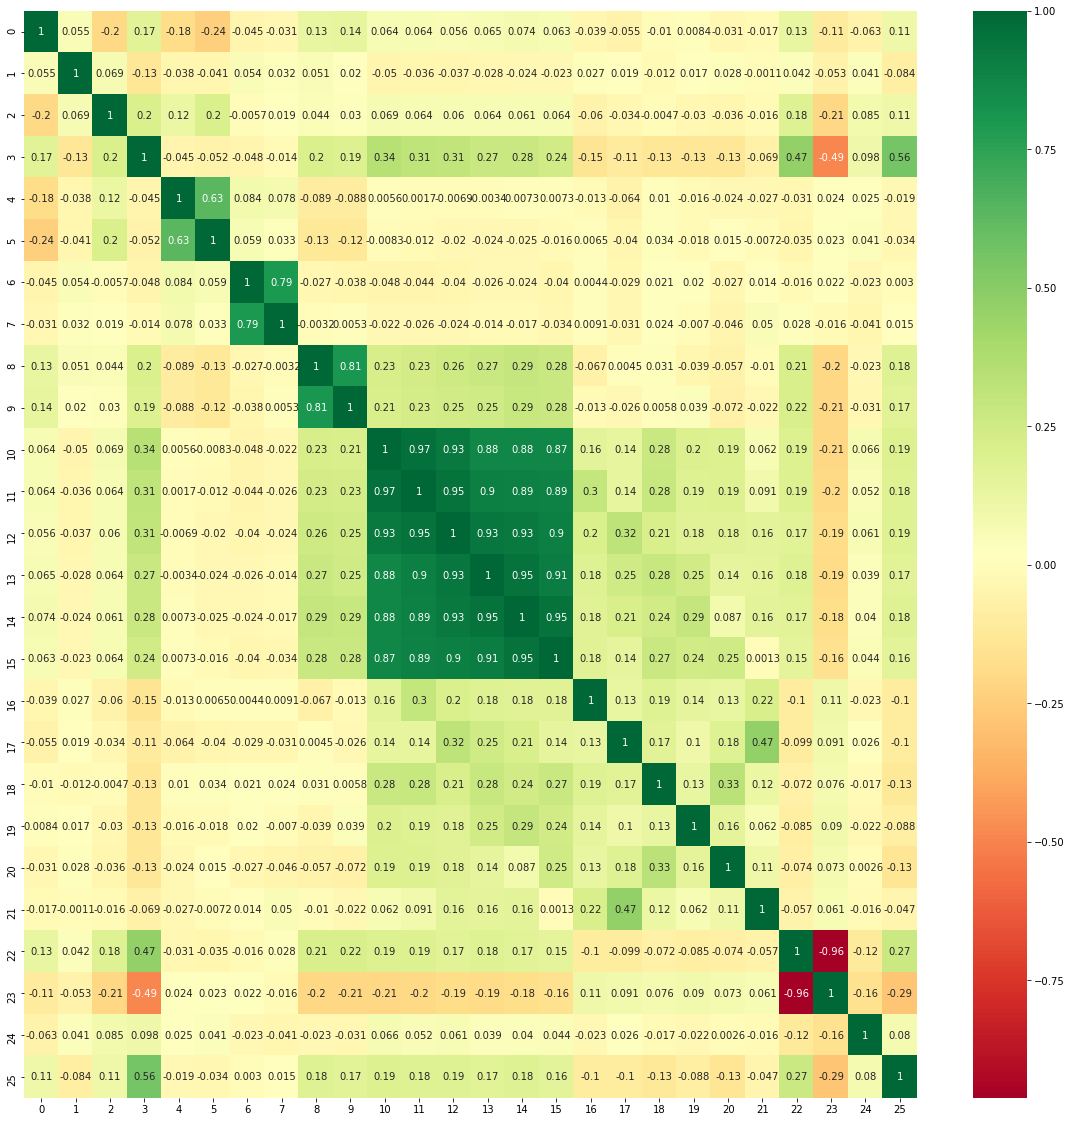

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = dataset_scaled.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset_scaled[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [31]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# select the number of features you want to retain.
select_k = 10


# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(mutual_info_classif, k=select_k).fit(dataset_x, dataset_y)

# display the retained features.
mutual_info_features = dataset_x.columns[selection.get_support()]
print(mutual_info_features)

Int64Index([3, 8, 9, 10, 11, 12, 14, 17, 20, 23], dtype='int64')


In [32]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# change this to how much features you want to keep from the top ones.
select_k = 10

# apply the chi2 score on the data and target (target should be binary).  
selection = SelectKBest(chi2, k=select_k).fit(dataset_x, dataset_y)

# display the k selected features.
chi_features = dataset_x.columns[selection.get_support()]
print(chi_features)

Int64Index([3, 10, 11, 12, 13, 14, 20, 22, 23, 24], dtype='int64')


In [33]:
# import the required functions and object.
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# select the number of features you want to retain.
select_k = 10

# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(f_classif, k=select_k).fit(dataset_x, dataset_y)

# display the retained features.
anova_features = dataset_x.columns[selection.get_support()]
print(anova_features)

Int64Index([3, 8, 9, 10, 11, 12, 13, 14, 22, 23], dtype='int64')


In [34]:
dataset_x_anova = dataset_x[anova_features]
dataset_x_anova

,3,8,9,10,11,12,13,14,22,23
0,0.000000,0.000000,0.000000,0.027553,0.025906,0.019322,0.005826,0.055240,0.0,1.0
1,0.018519,0.000000,0.000000,0.027553,0.025906,0.019322,0.005826,0.055240,0.0,1.0
2,0.018519,0.000000,0.000000,0.027553,0.025906,0.019322,0.005826,0.055240,0.0,1.0
3,0.018519,0.222222,0.111111,0.029720,0.026463,0.020463,0.006286,0.055240,0.0,1.0
4,0.018519,0.111111,0.111111,0.030794,0.051252,0.020171,0.008721,0.055240,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,0.722222,0.000000,0.000000,0.027553,0.025906,0.019322,0.005826,0.055240,1.0,0.0
996,0.740741,0.000000,0.000000,0.027553,0.025906,0.019322,0.005826,0.055240,1.0,0.0
997,0.777778,0.111111,0.111111,0.029273,0.027624,0.019959,0.007246,0.055873,1.0,0.0
998,0.962963,0.111111,0.111111,0.027345,0.025093,0.019830,0.005735,0.055487,1.0,0.0


---

## 2. Klasifikasi

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset_x_anova, dataset_y, test_size=0.2, random_state=12)

In [36]:
import torch

x_train = torch.from_numpy(x_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())
x_test = torch.from_numpy(x_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

In [37]:
from torch import nn, optim
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [38]:
net = Net(x_train.shape[1])

In [39]:
criterion = nn.BCELoss()

In [40]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [41]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

In [42]:
def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

for epoch in range(2500):
    y_pred = net(x_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 500 == 0:
        train_acc = calculate_accuracy(y_train, y_pred)
        y_test_pred = net(x_test)
        y_test_pred = torch.squeeze(y_test_pred)
        test_loss = criterion(y_test_pred, y_test)
        test_acc = calculate_accuracy(y_test, y_test_pred)
        print(f'''epoch {epoch} 
            Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
            Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
            ''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

epoch 0 
            Train set - loss: 0.717, accuracy: 0.403
            Test  set - loss: 0.718, accuracy: 0.405
            
epoch 500 
            Train set - loss: 0.507, accuracy: 0.762
            Test  set - loss: 0.521, accuracy: 0.74
            
epoch 1000 
            Train set - loss: 0.475, accuracy: 0.779
            Test  set - loss: 0.515, accuracy: 0.74
            
epoch 1500 
            Train set - loss: 0.47, accuracy: 0.772
            Test  set - loss: 0.519, accuracy: 0.755
            
epoch 2000 
            Train set - loss: 0.468, accuracy: 0.771
            Test  set - loss: 0.518, accuracy: 0.75
            


In [43]:
MODEL_PATH = 'model.pth'
torch.save(net, MODEL_PATH)

In [44]:
from sklearn.metrics import classification_report

classes = ['Not Default', 'Default']
y_pred = net(x_test)
y_pred = y_pred.ge(.5).view(-1).cpu()
y_test = y_test.cpu()
print(classification_report(y_test, y_pred, target_names=classes))


              precision    recall  f1-score   support

 Not Default       0.78      0.79      0.78       119
     Default       0.68      0.67      0.68        81

    accuracy                           0.74       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.74      0.74      0.74       200



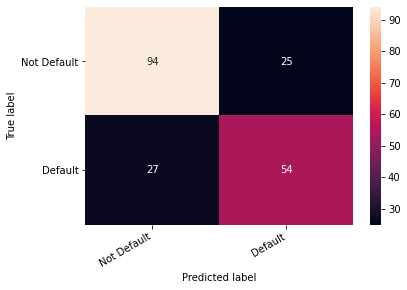

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [46]:
def cleanse_data(
            limit_bal,
            sex,
            education,
            marriage,
            age,
            pay_1,
            pay_2,
            pay_3,
            pay_4,
            pay_5,
            pay_6,
            bill_amt1,
            bill_amt2,
            bill_amt3,
            bill_amt4,
            bill_amt5,
            bill_amt6,
            pay_amt1,
            pay_amt2,
            pay_amt3,
            pay_amt4,
            pay_amt5,
            pay_amt6
        ):
            d = {"limit_bal":[limit_bal],
                "sex":[sex],
                "education":[education],
                "marriage":[marriage],
                "age":[age],
                "pay_1":[pay_1],
                "pay_2":[pay_2],
                "pay_3":[pay_3],
                "pay_4":[pay_4],
                "pay_5":[pay_5],
                "pay_6":[pay_6],
                "bill_amt1":[bill_amt1],
                "bill_amt2":[bill_amt2],
                "bill_amt3":[bill_amt3],
                "bill_amt4":[bill_amt4],
                "bill_amt5":[bill_amt5],
                "bill_amt6":[bill_amt6],
                "pay_amt1":[pay_amt1],
                "pay_amt2":[pay_amt2],
                "pay_amt3":[pay_amt3],
                "pay_amt4":[pay_amt4],
                "pay_amt5":[pay_amt5],
                "pay_amt6":[pay_amt6]}
            df = pd.DataFrame(d)
            df['sex'] = df['sex'].replace({2:1, 1:0, "2" : 1, "F" : 1, "1" : 0, "M" : 0})
            df['marriage_1.0'] = [1.0 if df['marriage'][0] == 1.0 else 0.0]
            df['marriage_2.0'] = [1.0 if df['marriage'][0] == 2.0 else 0.0]
            df['marriage_3.0'] = [1.0 if df['marriage'][0] == 3.0 else 0.0]
            df = df.drop(columns=['marriage'])
            df_scaled = creditCardScaler2.transform(df)
            df_scaled = pd.DataFrame(df_scaled)
            return df_scaled[anova_features]

In [47]:
def prediction(
    limit_bal,
    sex,
    education,
    marriage,
    age,
    pay_1,
    pay_2,
    pay_3,
    pay_4,
    pay_5,
    pay_6,
    bill_amt1,
    bill_amt2,
    bill_amt3,
    bill_amt4,
    bill_amt5,
    bill_amt6,
    pay_amt1,
    pay_amt2,
    pay_amt3,
    pay_amt4,
    pay_amt5,
    pay_amt6
):  
    cleaned_data = cleanse_data(
        limit_bal,
        sex,
        education,
        marriage,
        age,
        pay_1,
        pay_2,
        pay_3,
        pay_4,
        pay_5,
        pay_6,
        bill_amt1,
        bill_amt2,
        bill_amt3,
        bill_amt4,
        bill_amt5,
        bill_amt6,
        pay_amt1,
        pay_amt2,
        pay_amt3,
        pay_amt4,
        pay_amt5,
        pay_amt6
    )
    t = torch.from_numpy(cleaned_data.to_numpy()).float()
    output = net(t)
    return output.ge(0.5).item()

In [48]:
prediction(2000,2,2,2,21,-1,-1,2,2,-2,-2,0,0,0,0,0,0,0,0,0,0,162000,0)

False

In [49]:
prediction(250000,"F",2,1,75,0,-1,-1,-1,-2,-1,-14386,-13543,3432,-3684,0,1386,10118,47015,0,4000,100000,10000)


True

---

## 3. Klustering

In [50]:
clustering_dataset = pd.read_csv('./dataset_cleaned.csv')
clustering_dataset

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_STATUS_1.0,MARRIAGE_STATUS_2.0,MARRIAGE_STATUS_3.0,TARGET
0,0,20000.0,1,2.0,21.0,-1.0,-1.0,2.0,2.0,-2.0,...,0.0,0.0,0.0,0.0,162000.0,0.0,0,1,0,0
1,1,60000.0,1,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,1576.0,0,1,0,0
2,2,10000.0,0,2.0,22.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,1500.0,0,1,0,0
3,3,20000.0,1,1.0,22.0,0.0,0.0,2.0,-1.0,0.0,...,291.0,582.0,0.0,0.0,130291.0,651.0,0,1,0,0
4,4,20000.0,0,4.0,22.0,2.0,0.0,0.0,0.0,-1.0,...,13250.0,433.0,1831.0,0.0,2891.0,153504.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,320000.0,0,1.0,60.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
996,996,50000.0,1,2.0,61.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1
997,997,480000.0,0,1.0,63.0,0.0,0.0,0.0,2.0,-1.0,...,898.0,325.0,898.0,325.0,0.0,345293.0,1,0,0,1
998,998,80000.0,0,3.0,73.0,-1.0,0.0,0.0,2.0,-1.0,...,0.0,1000.0,0.0,500.0,0.0,1000.0,1,0,0,1


In [51]:
def map_age_range(data):
    return int(data/10)

In [52]:
clustering_dataset['AGE_RANGE'] = clustering_dataset['AGE'].apply(map_age_range)
clustering_dataset = clustering_dataset.drop(columns=['AGE'])

In [53]:
clustering_dataset_x = clustering_dataset[['SEX', 'EDUCATION', 'MARRIAGE_STATUS_1.0', 'MARRIAGE_STATUS_2.0', 'MARRIAGE_STATUS_3.0', 'AGE_RANGE']]

In [54]:
cluster_scaler = MinMaxScaler()
clustering_dataset_x = cluster_scaler.fit_transform(clustering_dataset_x)

In [55]:
clustering_dataset_x

array([[1.        , 0.33333333, 0.        , 1.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.8       ],
       [0.        , 0.66666667, 1.        , 0.        , 0.        ,
        1.        ],
       [1.        , 0.33333333, 1.        , 0.        , 0.        ,
        1.        ]])

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(clustering_dataset_x)
y_kmeans

array([2, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1,
       1, 2, 2, 1, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 0, 3, 2, 2, 1, 2, 3, 2, 3, 1, 2, 2, 1, 1, 3, 1, 2, 2,
       2, 2, 1, 2, 3, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3,
       1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 3, 2, 1, 3, 2, 2, 0, 1, 1, 3, 2, 2, 1, 2, 1, 2, 1, 0, 3,
       2, 3, 3, 1, 1, 1, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, 1,

In [57]:
y_kmeans.shape

(1000,)

In [58]:
clustering_dataset['CLUSTER'] = y_kmeans
clustering_dataset

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_STATUS_1.0,MARRIAGE_STATUS_2.0,MARRIAGE_STATUS_3.0,TARGET,AGE_RANGE,CLUSTER
0,0,20000.0,1,2.0,-1.0,-1.0,2.0,2.0,-2.0,-2.0,...,0.0,0.0,162000.0,0.0,0,1,0,0,2,2
1,1,60000.0,1,2.0,0.0,0.0,0.0,0.0,-2.0,-2.0,...,0.0,0.0,0.0,1576.0,0,1,0,0,2,2
2,2,10000.0,0,2.0,0.0,0.0,0.0,0.0,-2.0,-2.0,...,0.0,0.0,0.0,1500.0,0,1,0,0,2,1
3,3,20000.0,1,1.0,0.0,0.0,2.0,-1.0,0.0,-1.0,...,0.0,0.0,130291.0,651.0,0,1,0,0,2,2
4,4,20000.0,0,4.0,2.0,0.0,0.0,0.0,-1.0,-1.0,...,1831.0,0.0,2891.0,153504.0,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,320000.0,0,1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,1,0,0,1,6,0
996,996,50000.0,1,2.0,0.0,0.0,0.0,0.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,1,0,0,1,6,3
997,997,480000.0,0,1.0,0.0,0.0,0.0,2.0,-1.0,-1.0,...,898.0,325.0,0.0,345293.0,1,0,0,1,6,0
998,998,80000.0,0,3.0,-1.0,0.0,0.0,2.0,-1.0,-1.0,...,0.0,500.0,0.0,1000.0,1,0,0,1,7,0


In [59]:
clustering_dataset.to_csv('./result_clustering.csv')